<a href="https://colab.research.google.com/github/Eminent01/AMMI_Research/blob/main/AMMI_Research2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install stockstats
!pip install gym
!pip install stable-baselines3[extra]
!pip install tensorflow
# !pip install git+https://github.com/quantopian/pyfolio
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 110 kB 47.2 MB/s 
     |████████████████████████████████| 62 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 80.9 MB/s 
     |████████████████████████████████| 4.0 MB 65.5 MB/s 
     |████████████████████████████████| 128 kB 73.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https

### Download data from Yfinance API

In [2]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=ce5736da97944910c88a72540d4ee9091577376ab407c35558d0d13c70675a6b
  Stored in directory: /root/.cache/pip/wheels/6a/90/0c/08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


In [3]:
ticker_list = ['WBA', 'TRV', 'MMM', 'RTX', 'DD', 'KO', 'V', 'XOM', 'CAT', 'PG',
       'AXP', 'WMT', 'MSFT', 'VZ', 'JPM', 'UNH', 'DIS', 'HD', 'AAPL', 'CVX',
       'JNJ', 'CSCO', 'PFE', 'IBM', 'MRK', 'INTC', 'MCD', 'BA', 'NKE', 'GS']

In [4]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

df = yf.download(ticker_list, 
                      start='2010-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
print(df.head())

           Adj Close                                                         \
                AAPL        AXP         BA        CAT       CSCO        CVX   
Date                                                                          
2010-01-04  6.515212  33.792683  43.777554  41.353191  17.533104  47.266060   
2010-01-05  6.526477  33.718369  45.211330  41.847595  17.454994  47.600857   
2010-01-06  6.422665  34.263424  46.582798  41.974724  17.341370  47.606819   
2010-01-07  6.410791  34.819130  48.468563  42.144241  17.419489  47.427486   
2010-01-08  6.453412  34.794250  48.001019  42.617458  17.511799  47.511173   

                                                         ...    Volume  \
                   DD        DIS          GS         HD  ...       PFE   
Date                                                     ...             
2010-01-04  29.206360  27.933922  140.864258  21.122953  ...  54898644   
2010-01-05  30.507526  27.864239  143.354797  21.277679  ...  45714931 

In [5]:
data = df.copy()

In [6]:
data = data.stack().reset_index()
data.columns.names = [None]
data = data.drop(['Close'], axis=1)

In [7]:
data.head()

,Date,level_1,Adj Close,High,Low,Open,Volume
0,2010-01-04,AAPL,6.515212,7.660714,7.585000,7.622500,493729600
1,2010-01-04,AXP,33.792683,41.099998,40.389999,40.810001,6894300
2,2010-01-04,BA,43.777554,56.389999,54.799999,55.720001,6186700
3,2010-01-04,CAT,41.353191,59.189999,57.509998,57.650002,7325600
4,2010-01-04,CSCO,17.533104,24.840000,24.010000,24.110001,59853700


In [8]:
data.columns = ['date','stock_name','close','high','low','open','volume']

In [9]:
data.head()

,date,stock_name,close,high,low,open,volume
0,2010-01-04,AAPL,6.515212,7.660714,7.585000,7.622500,493729600
1,2010-01-04,AXP,33.792683,41.099998,40.389999,40.810001,6894300
2,2010-01-04,BA,43.777554,56.389999,54.799999,55.720001,6186700
3,2010-01-04,CAT,41.353191,59.189999,57.509998,57.650002,7325600
4,2010-01-04,CSCO,17.533104,24.840000,24.010000,24.110001,59853700


In [10]:
# check for missing values
data.isna().sum()

date          0
stock_name    0
close         0
high          0
low           0
open          0
volume        0
dtype: int64

In [11]:
# check if all stock have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['stock_name']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [12]:
data_points_df.head()

,0,1
0,WBA,2880
1,TRV,2880
2,MMM,2880
3,RTX,2880
4,DD,2880


In [13]:
##Save the data to CSV
data.to_csv('datasets.csv', index=False)

#### Create close price data



In [14]:
# read the data from the saved csv file
df_prices = pd.read_csv('/content/datasets.csv')

In [15]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['stock_name', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [16]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['stock_name', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [17]:
df_close.head()

,date,MMM,AAPL,KO,XOM,CSCO,MSFT,UNH,JNJ,AXP,...,TRV,DD,RTX,GS,CAT,MRK,V,HD,PG,CVX
0,2010-01-04,57.456104,6.515212,19.081617,41.998322,17.533104,23.683069,25.983177,44.278519,33.792683,...,36.311028,29.206360,33.066303,140.864258,41.353191,22.585728,20.094728,21.122953,41.439640,47.266060
1,2010-01-05,57.096214,6.526477,18.850792,42.162292,17.454994,23.690722,25.941977,43.765099,33.718369,...,35.450806,30.507526,32.572369,143.354797,41.847595,22.677271,19.864479,21.277679,41.453205,47.600857
2,2010-01-06,57.905952,6.422665,18.844101,42.526711,17.341370,23.545336,26.197437,44.121067,34.263424,...,34.947792,31.048018,32.401554,141.824661,41.974724,22.982399,19.597736,21.204002,41.256577,47.606819
3,2010-01-07,57.947498,6.410791,18.797262,42.393074,17.419489,23.300467,27.202810,43.806164,34.819130,...,35.450806,31.068035,32.540051,144.599991,42.144241,23.019018,19.780117,21.454493,41.032856,47.427486
4,2010-01-08,58.355820,6.453412,18.449356,42.223038,17.511799,23.461161,26.947350,43.956776,34.794250,...,35.399784,31.178141,32.604683,141.865402,42.617458,23.006819,19.834833,21.351347,40.978603,47.511173


In [18]:
# Save the Close Price datase
df_close.to_csv('close_prices.csv', index=False)

In [19]:
# ! pip install pandas-ta

In [20]:
# import matplotlib.pyplot as plt

In [21]:
# plt.plot(df)
# plt.xlabel("Date")
# plt.ylabel("Stock Price")

## Stock Selection using the stocks with least reconstruction error using Auto encoder network

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras import regularizers, optimizers
from sklearn import preprocessing
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns

In [23]:
close_price =pd.read_csv("/content/close_prices.csv")

In [24]:
df2 = close_price.copy()

In [25]:
df2 = df2.reset_index(drop=True).set_index(['date'])

In [26]:
df2.head()

,MMM,AAPL,KO,XOM,CSCO,MSFT,UNH,JNJ,AXP,DIS,...,TRV,DD,RTX,GS,CAT,MRK,V,HD,PG,CVX
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,57.456104,6.515212,19.081617,41.998322,17.533104,23.683069,25.983177,44.278519,33.792683,27.933922,...,36.311028,29.206360,33.066303,140.864258,41.353191,22.585728,20.094728,21.122953,41.439640,47.266060
2010-01-05,57.096214,6.526477,18.850792,42.162292,17.454994,23.690722,25.941977,43.765099,33.718369,27.864239,...,35.450806,30.507526,32.572369,143.354797,41.847595,22.677271,19.864479,21.277679,41.453205,47.600857
2010-01-06,57.905952,6.422665,18.844101,42.526711,17.341370,23.545336,26.197437,44.121067,34.263424,27.716160,...,34.947792,31.048018,32.401554,141.824661,41.974724,22.982399,19.597736,21.204002,41.256577,47.606819
2010-01-07,57.947498,6.410791,18.797262,42.393074,17.419489,23.300467,27.202810,43.806164,34.819130,27.724874,...,35.450806,31.068035,32.540051,144.599991,42.144241,23.019018,19.780117,21.454493,41.032856,47.427486
2010-01-08,58.355820,6.453412,18.449356,42.223038,17.511799,23.461161,26.947350,43.956776,34.794250,27.768425,...,35.399784,31.178141,32.604683,141.865402,42.617458,23.006819,19.834833,21.351347,40.978603,47.511173


In [27]:
def defineAutoencoder(num_stock, encoding_dim = 5, verbose=0):
    
    """
    Function for fitting an Autoencoder
    """

    # connect all layers
    input = Input(shape=(num_stock,))

    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.00001),name ='Encoder_Input')(input)

    decoded = Dense(num_stock, kernel_regularizer=regularizers.l2(0.00001), name ='Decoder_Input')(encoded)
    decoded = Activation("linear", name='Decoder_Activation_function')(decoded)

    # construct and compile AE model
    autoencoder = Model(inputs=input, outputs=decoded)
    adam = optimizers.Adam(lr=0.0005)
    autoencoder.compile(optimizer=adam, loss='mean_squared_error')
    if verbose!= 0:
        autoencoder.summary()

    return autoencoder

In [28]:
def getReconstructionErrorsDF(df_pct_change, reconstructed_data):
    
    """
    Function for calculating the reconstruction Errors
    """
    array = []
    stocks_ranked = []
    num_columns = reconstructed_data.shape[1]
    for i in range(0, num_columns):
        diff = np.linalg.norm((df_pct_change.iloc[:, i] - reconstructed_data[:, i]))  # 2 norm difference
        array.append(float(diff))

    ranking = np.array(array).argsort()
    r = 1
    for stock_index in ranking:
        stocks_ranked.append([ r
                              ,stock_index
                              ,df_pct_change.iloc[:, stock_index].name
                              ,array[stock_index]
                              ])
        r = r + 1

    columns = ['ranking','stock_index', 'stock_name' ,'recreation_error']
    df = pd.DataFrame(stocks_ranked, columns=columns)
    df = df.set_index('stock_name')
    return df

In [29]:
df_pct_change = df2.pct_change(1).astype(float)
df_pct_change = df_pct_change.replace([np.inf, -np.inf], np.nan)
df_pct_change = df_pct_change.fillna(method='ffill')

# the percentage change function will make the first two rows equal to nan
df_pct_change = df_pct_change.tail(len(df_pct_change) - 2)

In [30]:
# remove columns where there is no change over a longer time period
df_pct_change = df_pct_change[df_pct_change.columns[((df_pct_change == 0).mean() <= 0.05)]]

In [31]:
df_pct_change.head()

,MMM,AAPL,KO,XOM,CSCO,MSFT,UNH,JNJ,AXP,DIS,...,TRV,DD,RTX,GS,CAT,MRK,V,HD,PG,CVX
date,,,,,,,,,,,,,,,,,,,,,
2010-01-06,0.014182,-0.015906,-0.000355,0.008643,-0.006510,-0.006137,0.009847,0.008134,0.016165,-0.005314,...,-0.014189,0.017717,-0.005244,-0.010674,0.003038,0.013455,-0.013428,-0.003463,-0.004743,0.000125
2010-01-07,0.000717,-0.001849,-0.002486,-0.003142,0.004505,-0.010400,0.038377,-0.007137,0.016219,0.000314,...,0.014393,0.000645,0.004274,0.019569,0.004039,0.001593,0.009306,0.011813,-0.005423,-0.003767
2010-01-08,0.007046,0.006648,-0.018508,-0.004011,0.005299,0.006897,-0.009391,0.003438,-0.000715,0.001571,...,-0.001439,0.003544,0.001986,-0.018911,0.011229,-0.000530,0.002766,-0.004808,-0.001322,0.001765
2010-01-11,-0.004033,-0.008821,0.020308,0.011220,-0.002838,-0.012720,0.006728,0.000156,-0.011442,-0.016311,...,-0.000412,-0.012520,0.021662,-0.015777,0.062810,0.003979,-0.002874,-0.028295,-0.003971,0.017743
2010-01-12,0.000834,-0.011375,0.010841,-0.004979,-0.015860,-0.006607,-0.026428,0.005294,0.013262,-0.017219,...,0.006386,0.003251,-0.005820,-0.021800,-0.029471,-0.007926,-0.004726,-0.006392,0.011462,-0.005811


In [32]:
# define the input parameters
hidden_layers = 5
batch_size = 500
epochs = 100
stock_selection_number = 20
num_stock = df_pct_change.shape[1]
verbose = 1

In [33]:
# Normalize the data
df_scaler = preprocessing.MinMaxScaler()
df_pct_change_normalised = df_scaler.fit_transform(df_pct_change)

In [34]:
# define autoencoder
print('-' * 25 + 'Define autoencoder model')
num_stock = len(df_pct_change.columns)
autoencoder = defineAutoencoder(num_stock=num_stock, encoding_dim=hidden_layers, verbose=verbose)
#plot_model(autoencoder, to_file='img/model_autoencoder_1.png', show_shapes=True,
#           show_layer_names=True)

-------------------------Define autoencoder model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 Encoder_Input (Dense)       (None, 5)                 155       
                                                                 
 Decoder_Input (Dense)       (None, 30)                180       
                                                                 
 Decoder_Activation_function  (None, 30)               0         
  (Activation)                                                   
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
# train autoencoder
print('-' * 25 + 'Train autoencoder model')
autoencoder.fit(df_pct_change_normalised, df_pct_change_normalised, shuffle=False, epochs=epochs,
                batch_size=batch_size,
                verbose=verbose)

-------------------------Train autoencoder model
Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.2617
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2301
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2170
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2053
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1949
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1853
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1676
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1591
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1506
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1421
Epoch 13/100

In [36]:
# predict autoencoder
print('-' * 25 + 'Predict autoencoder model')
reconstruct = autoencoder.predict(df_pct_change_normalised)

-------------------------Predict autoencoder model
90/90 [==============================] - 0s 2ms/step


In [37]:

# Inverse transform dataset with MinMax Scaler
print('-' * 25 + 'Inverse transform dataset with MinMax Scaler')
reconstruct_real = df_scaler.inverse_transform(reconstruct)
df_reconstruct_real = pd.DataFrame(data=reconstruct_real, columns=df_pct_change.columns)

-------------------------Inverse transform dataset with MinMax Scaler


In [38]:
print('-' * 25 + 'Calculate L2 norm as reconstruction loss metric')
df_recreation_error = getReconstructionErrorsDF(df_pct_change=df_pct_change,
                                                reconstructed_data=reconstruct_real)

-------------------------Calculate L2 norm as reconstruction loss metric


In [39]:
df_recreation_error

,ranking,stock_index,recreation_error
stock_name,,,
PG,1,28,0.408589
JNJ,2,7,0.433556
KO,3,2,0.544123
PFE,4,15,0.586397
DIS,5,9,0.592644
MRK,6,25,0.612880
MMM,7,0,0.615873
HD,8,27,0.642272
VZ,9,11,0.652782


In [40]:
filtered_stocks = df_recreation_error.head(stock_selection_number).index

In [41]:
filtered_stocks

Index(['PG', 'JNJ', 'KO', 'PFE', 'DIS', 'MRK', 'MMM', 'HD', 'VZ', 'WMT', 'TRV',
       'NKE', 'IBM', 'XOM', 'MCD', 'CAT', 'V', 'RTX', 'GS', 'WBA'],
      dtype='object', name='stock_name')

In [42]:
# store the list of selected stocks
%store filtered_stocks

Stored 'filtered_stocks' (Index)


## Visualizing stocks with the least recreation error

In [136]:
df3 = close_price[['date','WMT','PG','JNJ','VZ', 'MRK','KO','PFE',	'MCD','TRV','XOM']]

In [137]:
df3.head()

,date,WMT,PG,JNJ,VZ,MRK,KO,PFE,MCD,TRV,XOM
0,2010-01-04,40.329685,41.439640,44.278519,16.828819,22.585728,19.081617,11.128049,43.471882,36.311028,41.998322
1,2010-01-05,39.928093,41.453205,43.765099,16.859154,22.677271,18.850792,10.969333,43.139519,35.450806,42.162292
2,2010-01-06,39.838848,41.256577,44.121067,16.374386,22.982399,18.844101,10.934060,42.550930,34.947792,42.526711
3,2010-01-07,39.861160,41.032856,43.806164,16.276922,23.019018,18.797262,10.892908,42.862534,35.450806,42.393074
4,2010-01-08,39.660366,40.978603,43.956776,16.287180,23.006819,18.449356,10.981082,42.820976,35.399784,42.223038


In [138]:
# Sort the stock data by date
df3 = df3.sort_values(by = ['date'])
df3

,date,WMT,PG,JNJ,VZ,MRK,KO,PFE,MCD,TRV,XOM
0,2010-01-04,40.329685,41.439640,44.278519,16.828819,22.585728,19.081617,11.128049,43.471882,36.311028,41.998322
1,2010-01-05,39.928093,41.453205,43.765099,16.859154,22.677271,18.850792,10.969333,43.139519,35.450806,42.162292
2,2010-01-06,39.838848,41.256577,44.121067,16.374386,22.982399,18.844101,10.934060,42.550930,34.947792,42.526711
3,2010-01-07,39.861160,41.032856,43.806164,16.276922,23.019018,18.797262,10.892908,42.862534,35.450806,42.393074
4,2010-01-08,39.660366,40.978603,43.956776,16.287180,23.006819,18.449356,10.981082,42.820976,35.399784,42.223038
...,...,...,...,...,...,...,...,...,...,...,...
2875,2021-06-07,137.656555,131.468384,158.632034,52.999485,68.659065,53.205357,37.098976,224.136414,151.864822,57.077938
2876,2021-06-08,136.611206,129.945724,157.236679,52.953156,68.281815,52.835083,36.965755,225.055435,151.653030,58.087673
2877,2021-06-09,135.878464,129.897537,159.353806,52.860497,69.828506,52.673683,37.879204,223.923599,149.794434,58.573837
2878,2021-06-10,136.660049,130.861237,160.787689,53.129200,71.809074,53.081932,38.707005,226.941864,149.097443,58.667332


In [139]:
def show_plot(df, fig_title):
  df.plot(x = 'date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

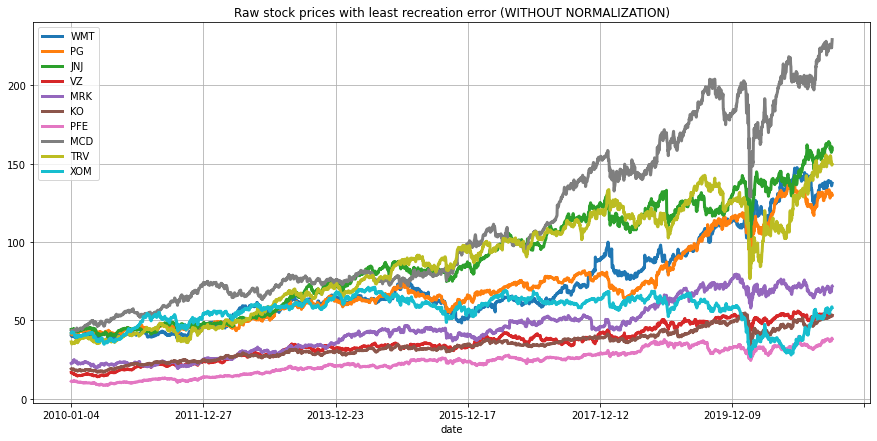

In [140]:
# Plot the data
show_plot(df3, 'Raw stock prices with least recreation error (WITHOUT NORMALIZATION)')

In [49]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df3['date'], y = df3[i], name = i) # add a new Scatter trace

  fig.show()

In [50]:
# Plot interactive chart
interactive_plot(df3, 'Prices')

### Normalized stock pricee

In [51]:
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

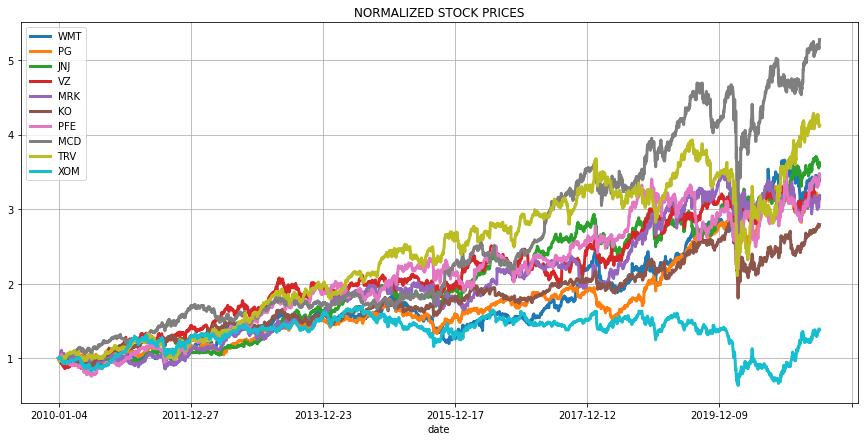

In [52]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(df3), 'NORMALIZED STOCK PRICES')

### Let's calculate the returns for  some sstocks and visualize them

In [134]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [141]:
# Get the daily returns 
stocks_daily_return = daily_return(df3)

In [55]:
stocks_daily_return

,date,WMT,PG,JNJ,VZ,MRK,KO,PFE,MCD,TRV,XOM
0,2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2010-01-05,-0.995745,0.032771,-1.159576,0.180321,0.405331,-1.209684,-1.426314,-0.764626,-2.369017,0.390459
2,2010-01-06,-0.223514,-0.474366,0.813388,-2.875432,1.345524,-0.035505,-0.321539,-1.364332,-1.418863,0.864295
3,2010-01-07,0.056006,-0.542294,-0.713717,-0.595232,0.159311,-0.248499,-0.376330,0.732307,1.439285,-0.314214
4,2010-01-08,-0.503724,-0.132227,0.343823,0.063043,-0.053030,-1.850854,0.809478,-0.096937,-0.143922,-0.401175
...,...,...,...,...,...,...,...,...,...,...,...
2875,2021-06-07,-0.669732,0.345740,-0.680858,-0.174511,-1.767614,-0.355634,-0.408677,-0.724134,-1.400010,-0.650940
2876,2021-06-08,-0.759411,-1.158183,-0.879637,-0.087415,-0.549466,-0.695926,-0.359075,0.410035,-0.139461,1.769040
2877,2021-06-09,-0.536371,-0.037083,1.346468,-0.174983,2.265182,-0.305479,2.471056,-0.502921,-1.225569,0.836955
2878,2021-06-10,0.575221,0.741892,0.899821,0.508326,2.836309,0.775046,2.185380,1.347906,-0.465308,0.159625


### Correlation between the daily returns

In [56]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['date']).corr()

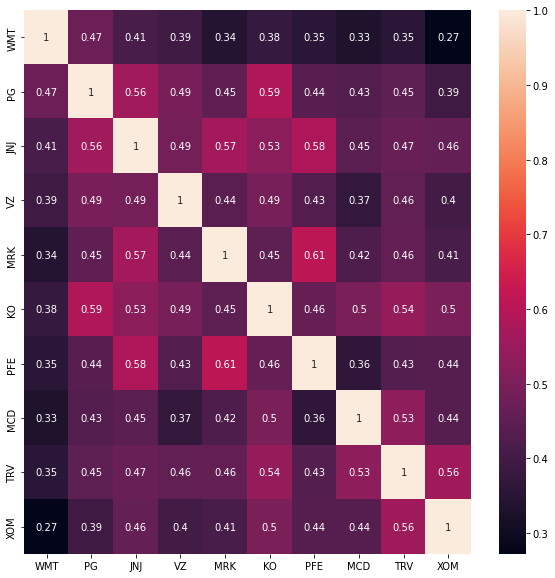

In [57]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

### Histogram plot of the returns

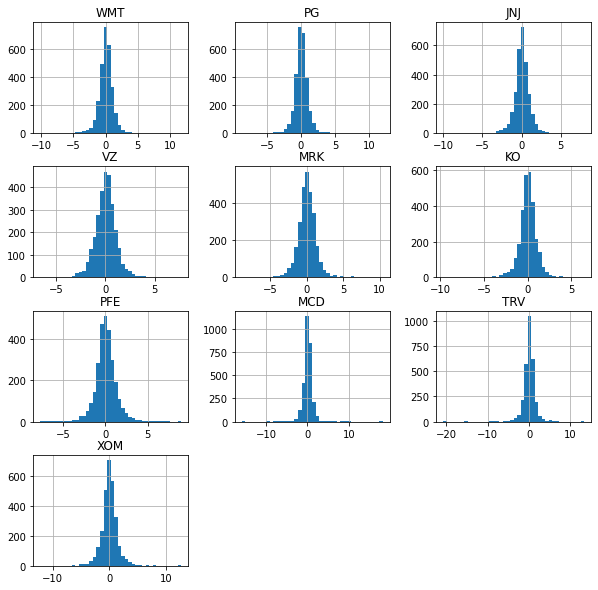

In [58]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [59]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -0.99574506, -0.22351387, ..., -0.53637063,
         0.57522069,  0.62196347]),
 array([ 0.        ,  0.03277133, -0.47436608, ..., -0.0370826 ,
         0.74189184, -0.68487824]),
 array([ 0.        , -1.15957561,  0.81338796, ...,  1.34646823,
         0.89982095, -1.26884446]),
 array([ 0.        ,  0.18032119, -2.87543182, ..., -0.17498294,
         0.50832561, -0.01743313]),
 array([0.        , 0.40533125, 1.34552366, ..., 2.26518168, 2.83630904,
        0.17072597]),
 array([ 0.        , -1.20968431, -0.03550454, ..., -0.30547852,
         0.77504559,  0.44714702]),
 array([ 0.        , -1.42631397, -0.3215391 , ...,  2.47105575,
         2.18538006, -1.30286267]),
 array([ 0.        , -0.76462608, -1.3643316 , ..., -0.50292103,
         1.34790618,  0.99748112]),
 array([ 0.        , -2.36901725, -1.41886312, ..., -1.22556857,
        -0.4653085 ,  0.29867216]),
 array([ 0.        ,  0.39045902,  0.86429484, ...,  0.83695544,
         0.15962456, -0.92430795

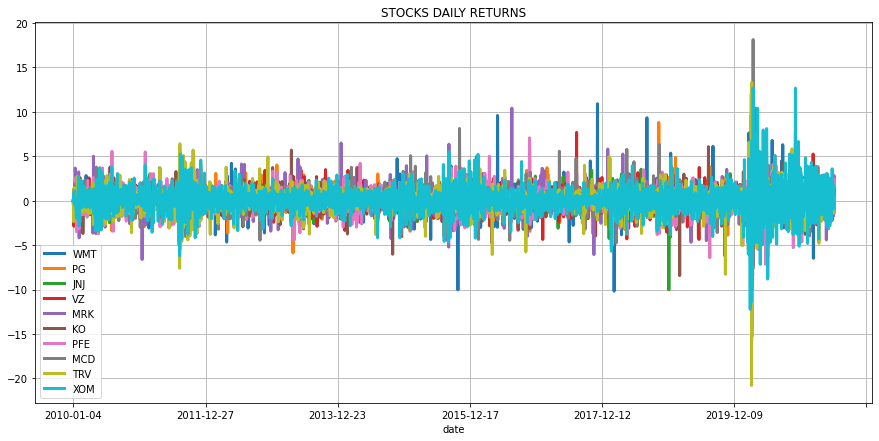

In [60]:
# Plot the daily returns
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [61]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

### Feature Engineering and Data Preprocessing

In [43]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=eebb86d0bc9762430eec0a1ad259f3db93f69609dd2a3ca0a442293c5bad8f88
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [63]:
 # Install the unstable development version in Jupyter notebook:
# !pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

In [64]:
# !pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

In [65]:
# !git clone https://github.com/AI4Finance-Foundation/FinRL.git

In [44]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
# from finrl.preprocessing.preprocessors import FeatureEngineer
# from finrl.preprocessing.data import data_split


In [45]:
list_of_stocks = filtered_stocks
print(list_of_stocks)

Index(['PG', 'JNJ', 'KO', 'PFE', 'DIS', 'MRK', 'MMM', 'HD', 'VZ', 'WMT', 'TRV',
       'NKE', 'IBM', 'XOM', 'MCD', 'CAT', 'V', 'RTX', 'GS', 'WBA'],
      dtype='object', name='stock_name')


In [46]:
data = data[data['stock_name'].isin(list_of_stocks)]
     

In [47]:
data.stock_name.unique()

array(['CAT', 'DIS', 'GS', 'HD', 'IBM', 'JNJ', 'KO', 'MCD', 'MMM', 'MRK',
       'NKE', 'PFE', 'PG', 'RTX', 'TRV', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype=object)

In [48]:
def add_features(data, feature_list, short_names):
    
    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names
    
    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high", 
    low="low", close="close", volume="volume") 
    
    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()
    
    return data

In [49]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast', 
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


In [50]:
# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)

/usr/local/lib/python3.8/dist-packages/ta/volume.py:319: RuntimeWarning: overflow encountered in double_scalars
  self._nvi.iloc[i] = self._nvi.iloc[i - 1] * (1.0 + price_change.iloc[i])
/usr/local/lib/python3.8/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.8/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [51]:
data_with_features.head()

,date,stock_name,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
42,2010-01-05,JNJ,43.765099,64.620003,63.820000,64.580002,10673100,49.322804,294.209144,-99723291,-37.294335,4.939972,0.000000,45.027553,50.133487,22.391574,49.843188
44,2010-01-05,KO,18.850792,28.495001,28.070000,28.424999,23172400,45.960034,294.378596,-122895691,-33.998891,2.078563,0.000000,43.572534,45.320765,-69.655010,46.969580
45,2010-01-05,MCD,43.139519,62.750000,62.189999,62.660000,7099000,45.753951,294.478920,-115796691,-34.520099,1.750593,4.296828,45.492933,44.985188,18.539395,49.996249
46,2010-01-05,MMM,57.096214,83.230003,81.699997,82.800003,2847000,45.187604,294.498127,-112949691,-34.181588,2.587041,4.272386,48.848549,46.848423,70.046364,51.702061
47,2010-01-05,MRK,22.677271,35.734734,35.238548,35.591602,15452550,42.854611,294.436855,-128402241,-34.923959,0.467225,4.183736,48.544474,43.129784,-52.346485,47.406989


In [52]:
feature_list = list(data_with_features.columns)[7:]

In [53]:
print(feature_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


In [54]:
def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','stock_name'],ignore_index=True) 
    df.index = df.date.factorize()[0]
    
    cov_list = [] # create empty list for storing coveriance matrices at each time step
    
    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'stock_name', values = 'close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values 
        covs = covs#/covs.max()
        cov_list.append(covs)
        
    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','stock_name']).reset_index(drop=True)
    
    return df


In [55]:
# Add Covariance Matrices to our dataset
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)

In [56]:
data_with_features_covs.head()

,date,stock_name,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2011-01-04,CAT,67.871872,94.639999,92.300003,94.639999,6119300,32.133991,271.134399,-29483203688,-44.112378,-0.047120,4.537986,33.182393,40.971768,76.943914,54.603567,"[[0.0003981765502263014, 0.0001866170315167641..."
1,2011-01-04,DIS,34.332920,39.000000,37.849998,37.930000,21974200,31.922779,270.657442,-29505177888,-41.596565,-0.573224,4.447462,34.131117,39.950407,-45.208250,48.962542,"[[0.0003981765502263014, 0.0001866170315167641..."
2,2011-01-04,GS,142.201019,174.000000,172.000000,173.869995,3335500,42.697209,270.687030,-29501842388,-41.993940,7.625981,5.651953,44.422223,55.681271,274.675913,62.412219,"[[0.0003981765502263014, 0.0001866170315167641..."
3,2011-01-04,HD,26.337034,35.560001,34.639999,35.270000,14359700,49.183590,270.966155,-29516202088,-40.670619,4.720243,5.518544,45.714403,51.166773,-57.583625,47.831552,"[[0.0003981765502263014, 0.0001866170315167641..."
4,2011-01-04,IBM,92.374496,141.701721,140.191208,141.070740,5292865,55.801700,271.009767,-29510909223,-40.131336,7.657821,5.942777,49.640261,57.506422,178.014587,54.374085,"[[0.0003981765502263014, 0.0001866170315167641..."


## Store the Dataframe

In [57]:
df = data_with_features_covs

In [58]:
%store df

Stored 'df' (DataFrame)


## Feature Reduction

In [59]:
# Get the list of all the features
features_list = list(df.columns)[7:-1]

In [60]:
print(features_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


In [61]:
# construct a data frame of features
features_df = df[features_list]
features_df.index = df['date']

In [62]:
features_df.head()

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2011-01-04,32.133991,271.134399,-29483203688,-44.112378,-0.047120,4.537986,33.182393,40.971768,76.943914,54.603567
2011-01-04,31.922779,270.657442,-29505177888,-41.596565,-0.573224,4.447462,34.131117,39.950407,-45.208250,48.962542
2011-01-04,42.697209,270.687030,-29501842388,-41.993940,7.625981,5.651953,44.422223,55.681271,274.675913,62.412219
2011-01-04,49.183590,270.966155,-29516202088,-40.670619,4.720243,5.518544,45.714403,51.166773,-57.583625,47.831552
2011-01-04,55.801700,271.009767,-29510909223,-40.131336,7.657821,5.942777,49.640261,57.506422,178.014587,54.374085


### Normalize the feature and construct an autoencoder

In [63]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [64]:
features_normalised.shape

(52540, 10)

In [65]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,10)

In [66]:
features_normalised.shape

(2627, 20, 10)

In [67]:
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

In [68]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
83/83 [==============================] - 3s 13ms/step - loss: 0.0782
Epoch 2/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0167
Epoch 3/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0112
Epoch 4/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0094
Epoch 5/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0084
Epoch 6/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0078
Epoch 7/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0072
Epoch 8/100
83/83 [==============================] - 1s 12ms/step - loss: 0.0066
Epoch 9/100
83/83 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 10/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0057
Epoch 11/100
83/83 [==============================] - 1s 12ms/step - loss: 0.0055
Epoch 12/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 13/100
83/83 [=====

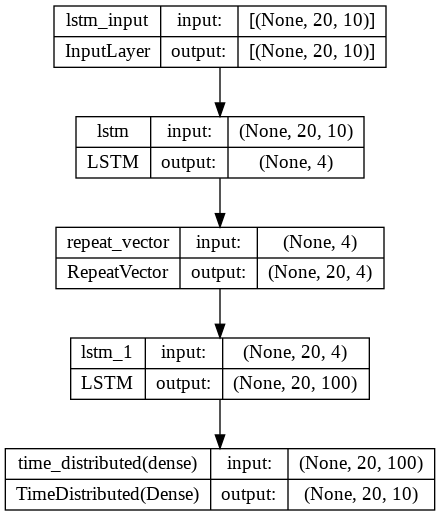

In [69]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)
plot_model(model, show_shapes=True)

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           42000     
                                                                 
 time_distributed (TimeDistr  (None, 20, 10)           1010      
 ibuted)                                                         
                                                                 
Total params: 43,250
Trainable params: 43,250
Non-trainable params: 0
_________________________________________________________________


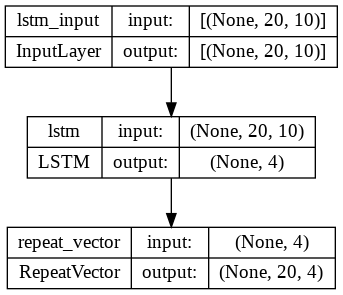

In [71]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)
plot_model(model_feature, show_shapes=True, show_layer_names=True)

In [72]:
model_feature.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 20, 10)]          0         
                                                                 
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


### Reconstructed Features

In [73]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

83/83 [==============================] - 0s 2ms/step
(2627, 20, 4)


In [74]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)

In [75]:
df.shape

(52540, 18)

In [76]:
features_reduced.shape

(52540, 4)

In [77]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(features_list, axis=1)

In [78]:
df_reduced.head()

,date,stock_name,close,high,low,open,volume,cov_list
0,2011-01-04,CAT,67.871872,94.639999,92.300003,94.639999,6119300,"[[0.0003981765502263014, 0.0001866170315167641..."
1,2011-01-04,DIS,34.332920,39.000000,37.849998,37.930000,21974200,"[[0.0003981765502263014, 0.0001866170315167641..."
2,2011-01-04,GS,142.201019,174.000000,172.000000,173.869995,3335500,"[[0.0003981765502263014, 0.0001866170315167641..."
3,2011-01-04,HD,26.337034,35.560001,34.639999,35.270000,14359700,"[[0.0003981765502263014, 0.0001866170315167641..."
4,2011-01-04,IBM,92.374496,141.701721,140.191208,141.070740,5292865,"[[0.0003981765502263014, 0.0001866170315167641..."


In [79]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])

In [80]:
features_reduced_df.head()

,f01,f02,f03,f04
0,3.403843,2.919432,1.105501,0.0
1,3.403843,2.919432,1.105501,0.0
2,3.403843,2.919432,1.105501,0.0
3,3.403843,2.919432,1.105501,0.0
4,3.403843,2.919432,1.105501,0.0


In [81]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]

In [82]:
df_reduced.head()

,date,stock_name,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2011-01-04,CAT,67.871872,94.639999,92.300003,94.639999,6119300,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
1,2011-01-04,DIS,34.332920,39.000000,37.849998,37.930000,21974200,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
2,2011-01-04,GS,142.201019,174.000000,172.000000,173.869995,3335500,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
3,2011-01-04,HD,26.337034,35.560001,34.639999,35.270000,14359700,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
4,2011-01-04,IBM,92.374496,141.701721,140.191208,141.070740,5292865,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0


In [83]:
data_df = df_reduced.copy()

In [84]:
%store data_df

Stored 'data_df' (DataFrame)


## Splitting Data into Test and Train

In [88]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
# from finrl.preprocessing.data import data_split
# from finrl.preprocessing.preprocessors import FeatureEngineer

In [90]:
data_df.head()

,date,stock_name,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2011-01-04,CAT,67.871872,94.639999,92.300003,94.639999,6119300,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
1,2011-01-04,DIS,34.332920,39.000000,37.849998,37.930000,21974200,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
2,2011-01-04,GS,142.201019,174.000000,172.000000,173.869995,3335500,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
3,2011-01-04,HD,26.337034,35.560001,34.639999,35.270000,14359700,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0
4,2011-01-04,IBM,92.374496,141.701721,140.191208,141.070740,5292865,"[[0.0003981765502263014, 0.0001866170315167641...",3.403843,2.919432,1.105501,0.0


In [93]:
df_close.head()

,date,MMM,AAPL,KO,XOM,CSCO,MSFT,UNH,JNJ,AXP,...,TRV,DD,RTX,GS,CAT,MRK,V,HD,PG,CVX
0,2010-01-04,57.456104,6.515212,19.081617,41.998322,17.533104,23.683069,25.983177,44.278519,33.792683,...,36.311028,29.206360,33.066303,140.864258,41.353191,22.585728,20.094728,21.122953,41.439640,47.266060
1,2010-01-05,57.096214,6.526477,18.850792,42.162292,17.454994,23.690722,25.941977,43.765099,33.718369,...,35.450806,30.507526,32.572369,143.354797,41.847595,22.677271,19.864479,21.277679,41.453205,47.600857
2,2010-01-06,57.905952,6.422665,18.844101,42.526711,17.341370,23.545336,26.197437,44.121067,34.263424,...,34.947792,31.048018,32.401554,141.824661,41.974724,22.982399,19.597736,21.204002,41.256577,47.606819
3,2010-01-07,57.947498,6.410791,18.797262,42.393074,17.419489,23.300467,27.202810,43.806164,34.819130,...,35.450806,31.068035,32.540051,144.599991,42.144241,23.019018,19.780117,21.454493,41.032856,47.427486
4,2010-01-08,58.355820,6.453412,18.449356,42.223038,17.511799,23.461161,26.947350,43.956776,34.794250,...,35.399784,31.178141,32.604683,141.865402,42.617458,23.006819,19.834833,21.351347,40.978603,47.511173


In [94]:
# Close Prices data frame

# Reset the Index to tic and date
df_prices = data_df.reset_index().set_index(['stock_name', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in filtered_stocks:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

In [95]:
df_close.head()

,PG,JNJ,KO,PFE,DIS,MRK,MMM,HD,VZ,WMT,TRV,NKE,IBM,XOM,MCD,CAT,V,RTX,GS,WBA
date,,,,,,,,,,,,,,,,,,,,
2011-01-04,45.389988,44.897968,22.039400,11.020789,34.332920,23.145626,61.520828,26.337034,21.324127,41.668427,41.635998,18.247059,92.374496,46.720497,53.133720,67.871872,16.203300,37.412922,142.201019,28.527472
2011-01-05,45.285179,44.869625,21.908281,11.094295,35.187054,23.279339,61.520828,26.253487,21.616787,41.394547,41.388744,18.366577,92.005371,46.595726,53.383995,68.458557,16.545269,37.464939,142.957001,28.923203
2011-01-06,45.208305,44.798752,21.749544,11.137181,34.914082,23.597708,61.144596,26.147129,21.063307,41.052200,40.751873,18.201422,93.012703,46.895145,53.062218,67.748787,16.793139,37.427113,141.486282,29.009531
2011-01-07,45.075520,44.366432,21.711590,11.235197,34.737968,23.782362,61.208523,26.116747,20.888895,41.143497,39.957664,18.151445,92.555946,47.150898,53.176655,67.886391,16.744936,37.394012,140.237473,28.836863
2011-01-10,44.977688,44.054596,21.759899,11.186191,34.781990,23.686855,61.861561,26.124344,20.883085,40.877216,40.347282,18.290525,92.374496,46.863960,52.597473,67.640129,16.480997,37.100842,139.473358,29.462803


In [96]:
df_close = df_close.reset_index()

### Split Data

In [97]:
# Define the start and end dates for the train and test data

train_pct = 0.8 # percentage of train data
date_list = list(data_df.date.unique()) # List of dates in the data

date_list_len = len(date_list) # len of the date list
train_data_len = int(train_pct * date_list_len) # length of the train data

train_start_date = date_list[0]
train_end_date = date_list[train_data_len]

test_start_date = date_list[train_data_len+1]
test_end_date = date_list[-1]

In [98]:
print('Training Data: ', 'from ', train_start_date, ' to ', train_end_date)


print('Testing Data: ', 'from ', test_start_date, ' to ', test_end_date)

Training Data:  from  2011-01-04T00:00:00.000000000  to  2019-05-13T00:00:00.000000000
Testing Data:  from  2019-05-14T00:00:00.000000000  to  2021-06-11T00:00:00.000000000


In [102]:
def data_split(df, start, end, target_date_col="date"):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[target_date_col] >= start) & (df[target_date_col] < end)]
    data = data.sort_values([target_date_col, "stock_name"], ignore_index=True)
    data.index = data[target_date_col].factorize()[0]
    return data

In [103]:
# Split the whole dataset
train_data = data_split(data_df, train_start_date, train_end_date)
test_data = data_split(data_df, test_start_date, test_end_date)

# Split the Close Prices dataset
prices_train_data = df_close[df_close['date']<=train_end_date]
prices_test_data = df_close[df_close['date']>=test_start_date]

# split the Close Prices of all stocks
prices_full_train = df_close[df_close['date']<=train_end_date]
prices_full_test = df_close[df_close['date']>=test_start_date]

### Store the data frame

In [104]:
prices_train = prices_train_data.copy()
prices_test = prices_test_data.copy()

train_df = train_data.copy()
test_df = test_data.copy()

prices_full_train_df = prices_full_train.copy()
prices_full_test_df = prices_full_test.copy()

In [105]:
%store prices_train
%store prices_test

%store train_df
%store test_df

%store prices_full_train_df
%store prices_full_test_df

Stored 'prices_train' (DataFrame)
Stored 'prices_test' (DataFrame)
Stored 'train_df' (DataFrame)
Stored 'test_df' (DataFrame)
Stored 'prices_full_train_df' (DataFrame)
Stored 'prices_full_test_df' (DataFrame)


In [106]:
from IPython.display import display, HTML
from datetime import datetime

In [130]:
# from pypfopt.efficient_frontier import EfficientFrontier, objective_functions
from pypfopt.efficient_frontier import EfficientFrontier
# from pypfopt.efficient_frontier import Objective_functions
from pypfopt import objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [109]:
prices_train_df = prices_full_train_df.copy()
prices_test_df = prices_full_test_df.copy()

In [110]:
prices_train_df = prices_train_df.reset_index(drop=True).set_index(['date'])
prices_test_df = prices_test_df.reset_index(drop=True).set_index(['date'])

In [111]:
prices_train_df.head()

,PG,JNJ,KO,PFE,DIS,MRK,MMM,HD,VZ,WMT,TRV,NKE,IBM,XOM,MCD,CAT,V,RTX,GS,WBA
date,,,,,,,,,,,,,,,,,,,,
2011-01-04,45.389988,44.897968,22.039400,11.020789,34.332920,23.145626,61.520828,26.337034,21.324127,41.668427,41.635998,18.247059,92.374496,46.720497,53.133720,67.871872,16.203300,37.412922,142.201019,28.527472
2011-01-05,45.285179,44.869625,21.908281,11.094295,35.187054,23.279339,61.520828,26.253487,21.616787,41.394547,41.388744,18.366577,92.005371,46.595726,53.383995,68.458557,16.545269,37.464939,142.957001,28.923203
2011-01-06,45.208305,44.798752,21.749544,11.137181,34.914082,23.597708,61.144596,26.147129,21.063307,41.052200,40.751873,18.201422,93.012703,46.895145,53.062218,67.748787,16.793139,37.427113,141.486282,29.009531
2011-01-07,45.075520,44.366432,21.711590,11.235197,34.737968,23.782362,61.208523,26.116747,20.888895,41.143497,39.957664,18.151445,92.555946,47.150898,53.176655,67.886391,16.744936,37.394012,140.237473,28.836863
2011-01-10,44.977688,44.054596,21.759899,11.186191,34.781990,23.686855,61.861561,26.124344,20.883085,40.877216,40.347282,18.290525,92.374496,46.863960,52.597473,67.640129,16.480997,37.100842,139.473358,29.462803


In [112]:
prices_test_df.head()

,PG,JNJ,KO,PFE,DIS,MRK,MMM,HD,VZ,WMT,TRV,NKE,IBM,XOM,MCD,CAT,V,RTX,GS,WBA
date,,,,,,,,,,,,,,,,,,,,
2019-05-14,96.841370,123.944122,43.342228,33.897572,131.591782,65.606819,152.994614,175.426300,48.128426,94.703445,133.492554,80.741470,107.301285,62.083057,181.523727,116.605583,156.340576,76.925629,180.534805,45.216259
2019-05-15,97.850128,124.025635,43.778400,34.306080,133.053909,65.716965,152.042786,175.554474,48.349697,94.316284,134.234619,81.069565,108.178642,62.541664,182.495468,116.450073,158.858231,76.925629,180.645187,45.353844
2019-05-16,99.143181,125.203300,44.134468,34.714581,133.864014,67.055870,150.025696,176.122086,48.834812,95.666603,135.050018,81.330116,109.369888,62.533485,183.338882,115.818871,161.135452,78.083153,183.165405,45.147457
2019-05-17,98.537918,125.565651,43.796204,34.572861,133.409576,66.708450,147.650589,176.305206,49.439083,95.241692,135.123306,81.609955,108.114250,62.164974,182.633011,112.297020,160.373154,77.217171,181.592575,45.329567
2019-05-20,98.427879,125.393532,43.484642,34.672905,132.293228,66.844040,145.170685,174.812958,50.222069,95.864906,135.746292,79.950150,108.758171,62.156765,182.422150,111.995140,159.767181,77.061287,181.417816,45.320896


## Uniform Weighted Portfolio


In [114]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [115]:
ticker_list = list(prices_train_df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)


uniform weights portfolio:



,PG,JNJ,KO,PFE,DIS,MRK,MMM,HD,VZ,WMT,TRV,NKE,IBM,XOM,MCD,CAT,V,RTX,GS,WBA
0,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%,5.000%


In [116]:
uniform_weights

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [118]:
# Plotting the Daily Draw Down

ticker_symb = ['PG']
prices = prices_train_df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb) 
#daily_drawdown = pd.DataFrame(daily_drawdown)

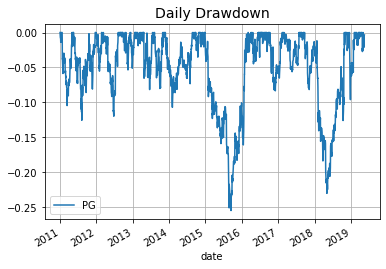

In [120]:
fig, ax = plt.subplots(figsize=(6,4))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

# fig.savefig('results/daily_drawdown.png');

In [121]:
# Using the average daily return to calculate portfolio return

returns = prices_train_df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))

uniform weights portfolio average daily return = 0.0526%


In [122]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weigths):
    months = (pd.to_datetime(prices_train_df.index)[-1] - pd.to_datetime(prices_train_df.index)[0]) / np.timedelta64(1, 'M')
    months = np.floor(months)
    total_return = (prices.iloc[-1].dot(weigths) - prices.iloc[0].dot(weigths)) / prices.iloc[0].dot(weigths)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return


uw_annual_return = get_annualized_return(prices_train_df, uniform_weights)

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))

uw_var = get_portfolio_variance(returns, uniform_weights)

print("uniform weights portfolio annualized return = {:.4%}".format(uw_annual_return))
print("uniform weights portfolio annualized variance = {:.1%}".format(uw_var))
print("uniform weights portfolio annualized std = {:.1%}".format(np.sqrt(uw_var)))

uniform weights portfolio annualized return = 11.0083%
uniform weights portfolio annualized variance = 1.7%
uniform weights portfolio annualized std = 12.9%


In [123]:
# Sharpe ratio

uniform_returns = returns.dot(uniform_weights)

rfr = 0.04 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(250)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))

uniform weights portfolio sharpe ratio = 0.54


Text(0.5, 1.0, 'Uniform Weights Culmulative Returns')

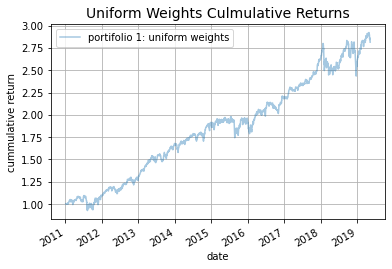

In [125]:
# Plotting the cummulative return
uniform_cum_returns = (1 + uniform_returns).cumprod()
uniform_cum_returns.name = "portifolio 1: uniform weights"

fig, ax = plt.subplots(figsize=(6,4))
uniform_cum_returns.plot(ax=ax, alpha=0.4);

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("cummulative return");
ax.set_title('Uniform Weights Culmulative Returns', fontsize=14)

# fig.savefig('results/uniform_weights_portfolio.png');

## Maximum Sharpe Ratio Portfolio

In [131]:
## We use PyPortfolioOpt library to get the weights for the Maximum Sharpe Portfolio
mu = expected_returns.mean_historical_return(prices_train_df)
Sigma = risk_models.sample_cov(prices_train_df)
ef = EfficientFrontier(mu,Sigma)
ef.add_objective(objective_functions.L2_reg, gamma=1)

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()

max sharpe portfolio:


/usr/local/lib/python3.8/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,PG,JNJ,KO,PFE,DIS,MRK,MMM,HD,VZ,WMT,TRV,NKE,IBM,XOM,MCD,CAT,V,RTX,GS,WBA
0,3.691%,5.619%,2.819%,6.269%,7.770%,5.579%,4.161%,12.944%,4.066%,4.045%,6.474%,8.928%,0.000%,0.000%,7.623%,0.693%,16.098%,2.525%,0.000%,0.695%


Expected annual return: 18.1%
Annual volatility: 13.2%
Sharpe Ratio: 1.22



/usr/local/lib/python3.8/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:444: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


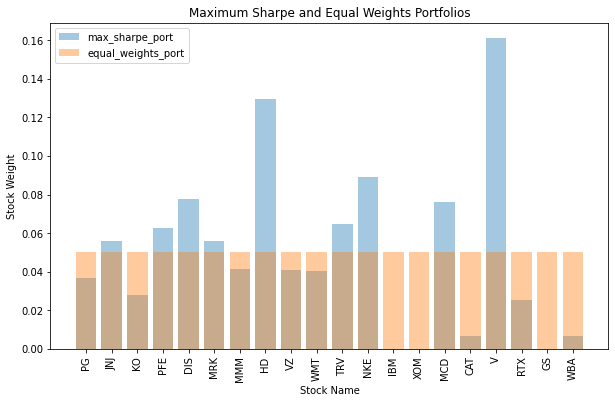

In [133]:
plt.subplots(figsize=(10,6))
plt.title('Maximum Sharpe and Equal Weights Portfolios')
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='max_sharpe_port')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='equal_weights_port')
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Minimum Variance Portfolio

In [144]:
import scipy.optimize as sco
import scipy.interpolate as sci

In [142]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(stocks_daily_return.mean() * weights)) * 253

In [143]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (stocks_daily_return.cov() * 253) @ weights)

In [146]:
# For loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(5000):
  # Return random floats in the half-open interval [0.0, 1.0)
  weights = np.random.random(size = len(filtered_stocks)) 
  # Normalize to unity
  # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
  weights /= np.sum(weights) 

In [148]:
weights.shape

(20,)

In [149]:
filtered_stocks.shape

(20,)

In [147]:
# We use an anonymous lambda function
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# This creates 12 tuples of (0, 1), all of which exist within a container tuple
# We essentially create a sequence of (min, max) pairs
bounds = tuple((0, 1) for w in weights)

# Repeat the list with the value (1 / 12) 12 times, and convert list to array
equal_weights = np.array(
  [1 / len(filtered_stocks)] * len(filtered_stocks)
)
# Minimize sd
min_sd_results = sco.minimize(
  # Objective function
  fun = portfolio_sd, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

ValueError: ignored